In [26]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import yfinance as yf
import datetime
from stats import *
import statsmodels.api as sm

In [54]:
yf.pdr_override()
start = datetime.datetime(2014, 9 , 17)
end = datetime.datetime.today()

data_dict = {}
stocks = ["BTC-USD", "ETH-USD", "DOGE-USD","^GSPC", "^DJI", "^IXIC","^CMC200"]
for key in stocks:
    data_dict[key] = web.get_data_yahoo(key, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
close_data = pd.concat([val["Close"] for val in data_dict.values()], 
                       keys = data_dict.keys(), 
                       axis = 1)
close_data.head()

,BTC-USD,ETH-USD,DOGE-USD,^GSPC,^DJI,^IXIC,^CMC200
Date,,,,,,,
2014-09-17,457.334015,NaN,NaN,2001.569946,17156.849609,4562.189941,NaN
2014-09-18,424.440002,NaN,NaN,2011.359985,17265.990234,4593.430176,NaN
2014-09-19,394.795990,NaN,NaN,2010.400024,17279.740234,4579.790039,NaN
2014-09-20,408.903992,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-21,398.821014,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\joeyw\AppData\Local\Temp\ipykernel_22804\916516914.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])


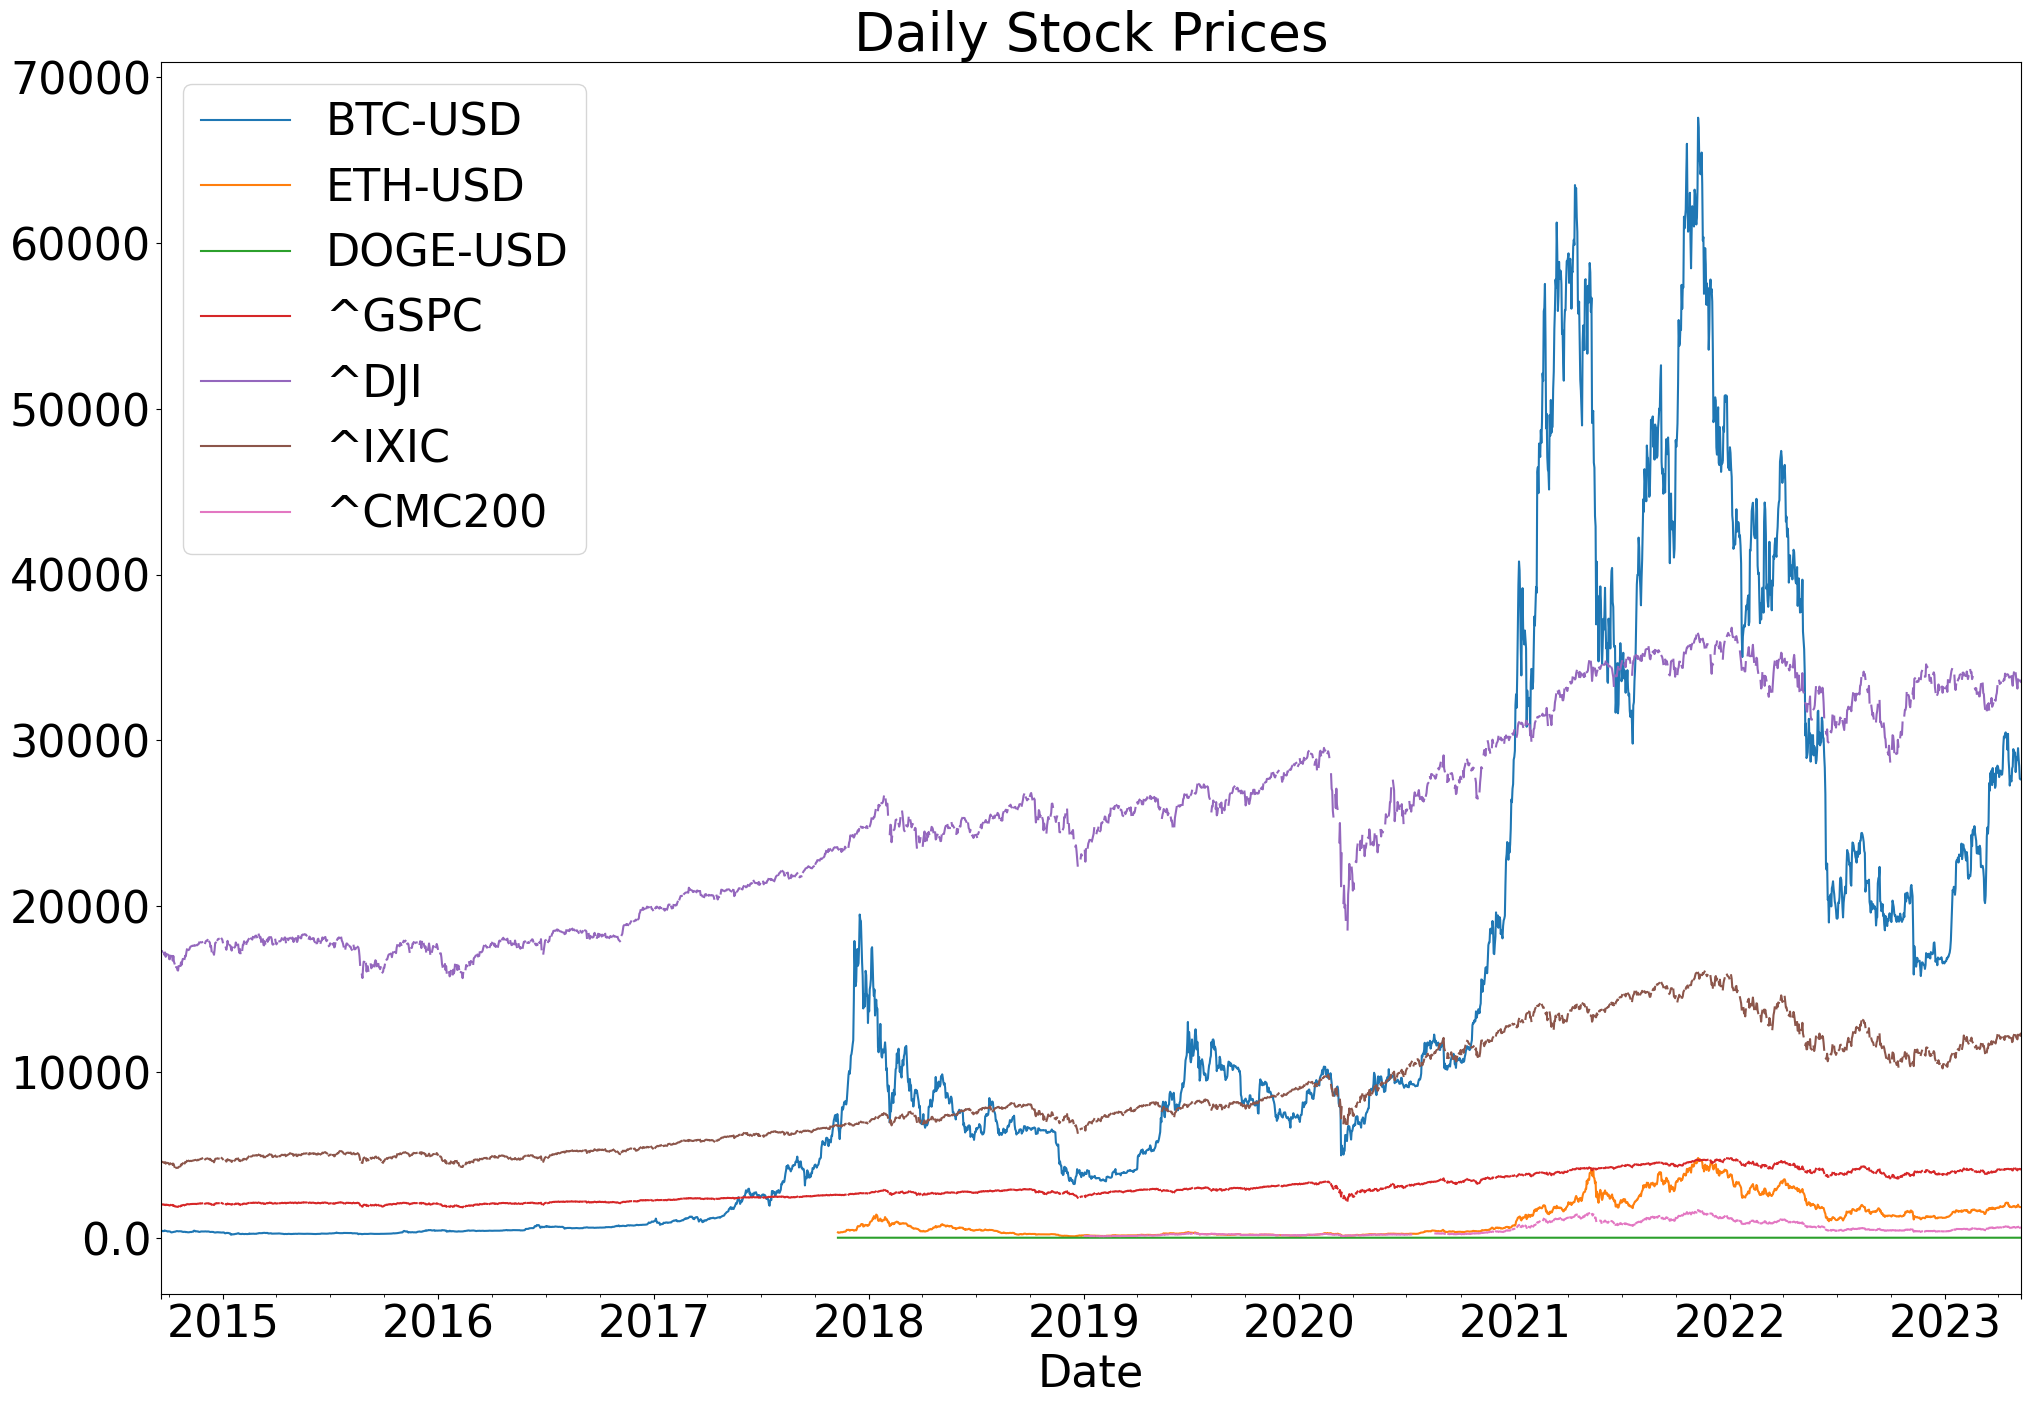

In [4]:
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)
y_vals = ax.get_yticks()
ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])    

plt.title("Daily Stock Prices")
plt.show()
plt.close()

In [5]:
BitCoin=data_dict["BTC-USD"]
BitCoin

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-05-05,28851.480469,29668.908203,28845.509766,29534.384766,29534.384766,17936566518
2023-05-06,29538.859375,29820.126953,28468.966797,28904.623047,28904.623047,15913866714
2023-05-07,28901.623047,29157.517578,28441.367188,28454.978516,28454.978516,11301355486


<AxesSubplot:xlabel='Date'>

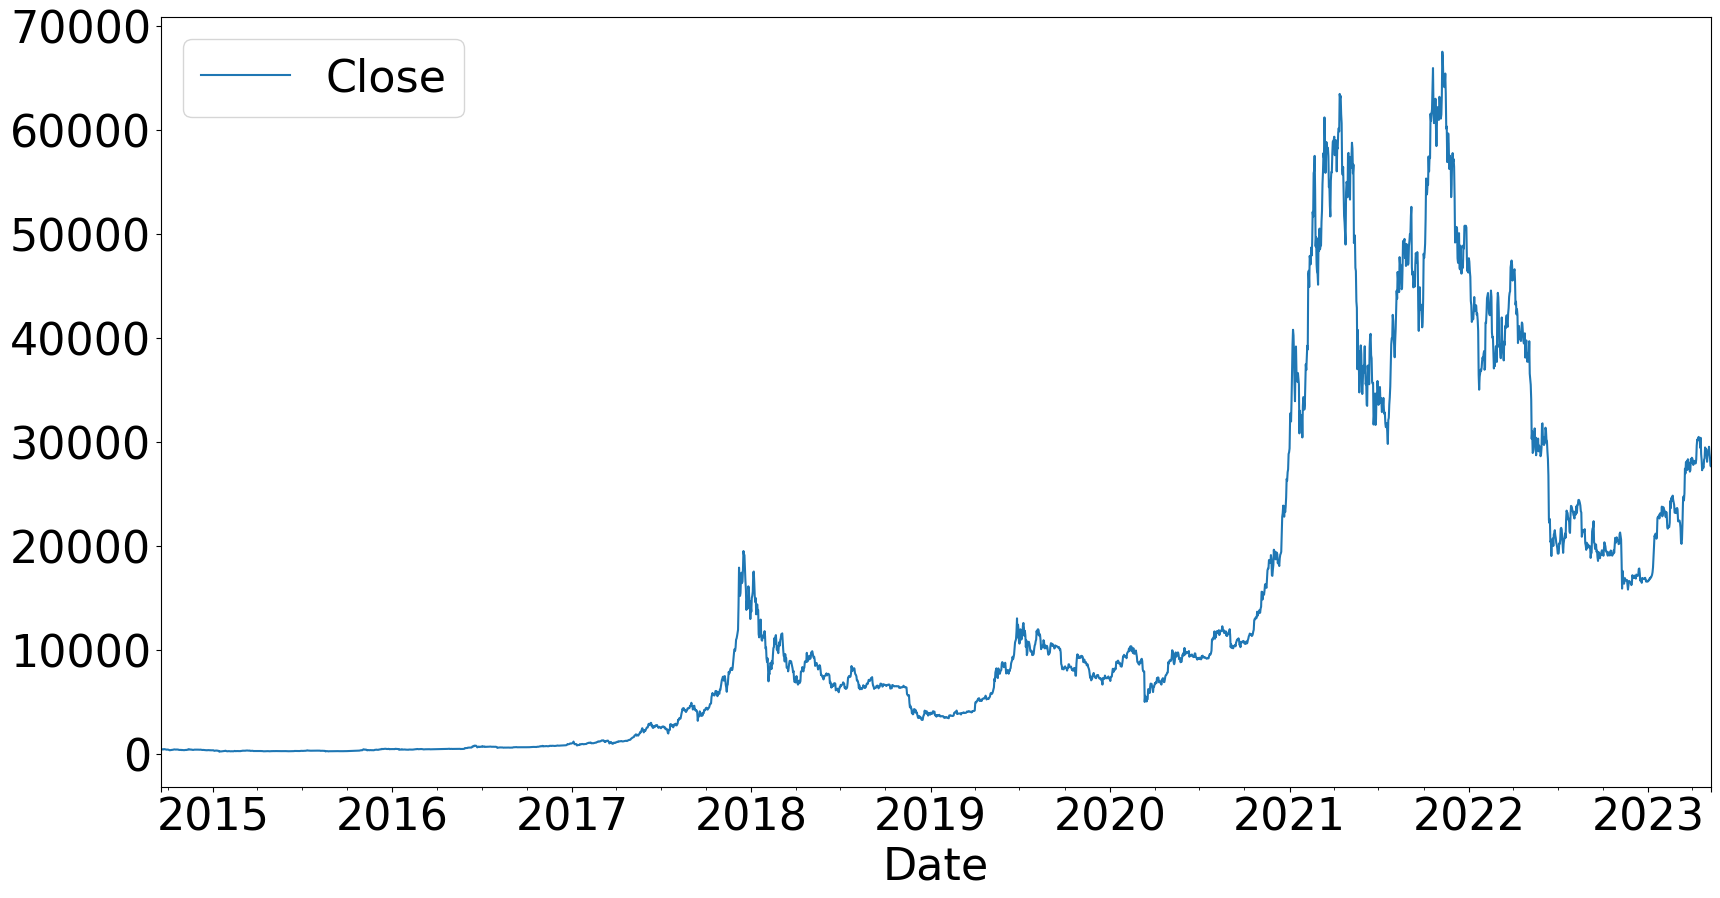

In [6]:
fig, ax=plt.subplots(figsize=(20,10))
BitCoin["Close"].plot.line(ax=ax,legend=True)

In [7]:
data_dict["ETH-USD"]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...
2023-05-05,1877.833130,1998.413574,1876.946655,1995.060913,1995.060913,9498261360
2023-05-06,1995.479126,2017.559448,1870.605591,1900.221802,1900.221802,9623243037
2023-05-07,1899.917603,1933.998413,1873.076416,1873.076416,1873.076416,6883942236


<AxesSubplot:xlabel='Date'>

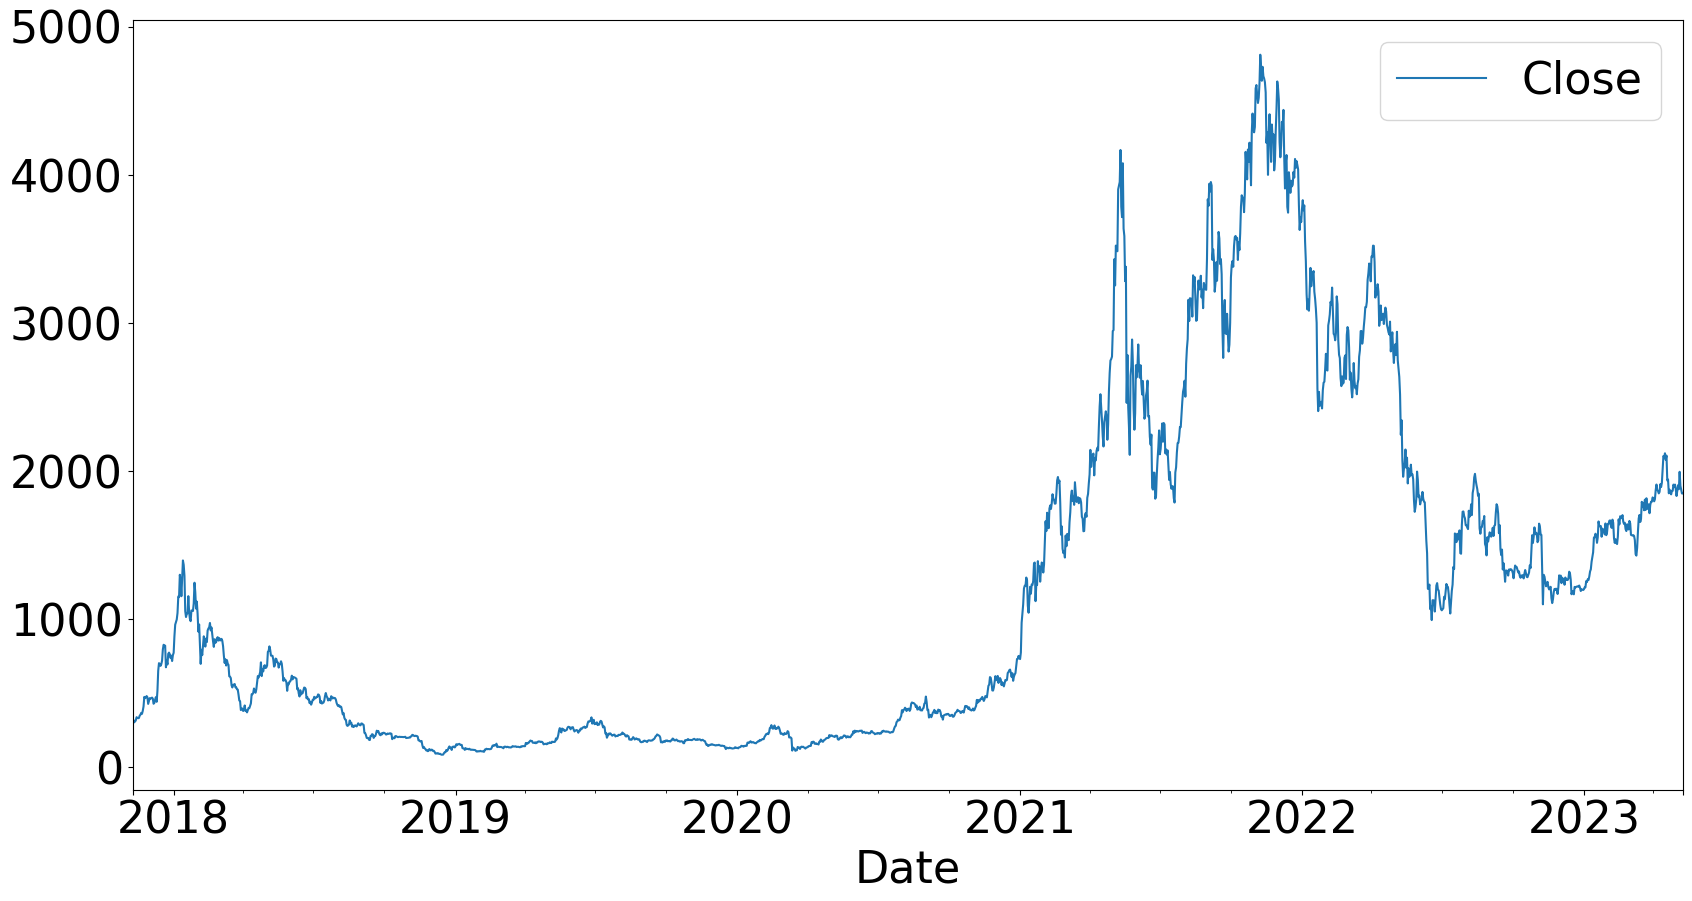

In [8]:
fig, ax=plt.subplots(figsize=(20,10))
data_dict["ETH-USD"]["Close"].plot.line(ax=ax,legend=True)

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2017-11-09  0.001207  0.001415  0.001181  0.001415   0.001415    6259550
2017-11-10  0.001421  0.001431  0.001125  0.001163   0.001163    4246520
2017-11-11  0.001146  0.001257  0.001141  0.001201   0.001201    2231080
2017-11-12  0.001189  0.001210  0.001002  0.001038   0.001038    3288960
2017-11-13  0.001046  0.001212  0.001019  0.001211   0.001211    2481270
...              ...       ...       ...       ...        ...        ...
2023-05-05  0.078452  0.081292  0.077910  0.080390   0.080390  335482524
2023-05-06  0.080385  0.080385  0.076439  0.076998   0.076998  341154511
2023-05-07  0.076987  0.077496  0.076693  0.076710   0.076710  205466114
2023-05-08  0.076697  0.077107  0.070946  0.072473   0.072473  459549555
2023-05-09  0.072473  0.073304  0.072288  0.073139   0.073139  249148363

[2008 rows x 6 columns]


<AxesSubplot:xlabel='Date'>

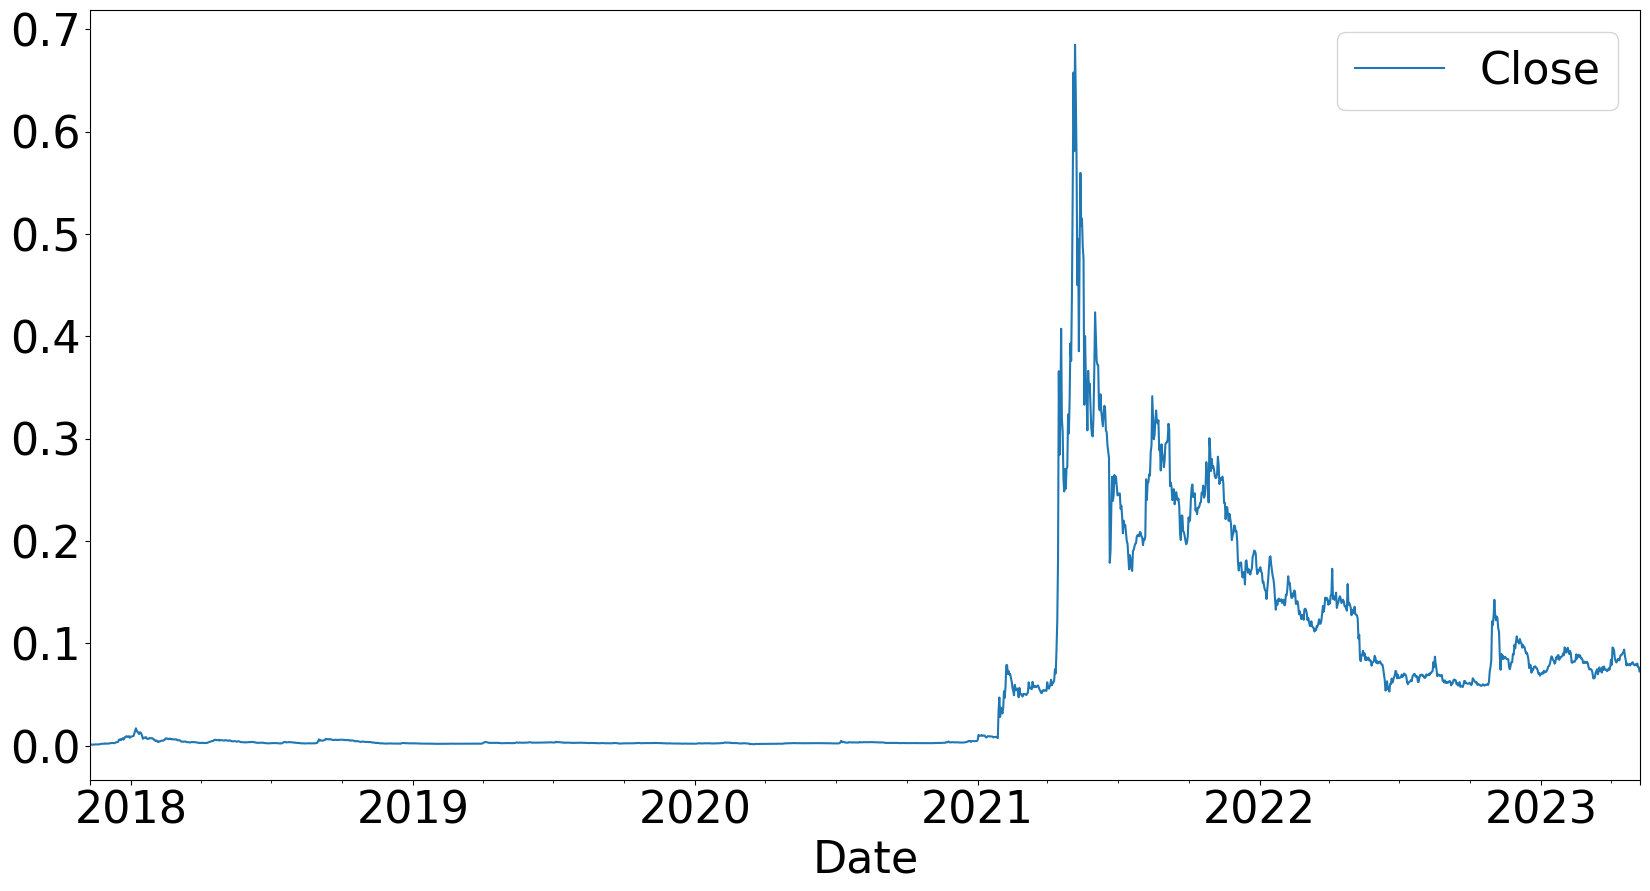

In [9]:
print(data_dict["DOGE-USD"])
fig, ax=plt.subplots(figsize=(20,10))
data_dict["DOGE-USD"]["Close"].plot.line(ax=ax,legend=True)

In [10]:
CMC200=data_dict["^CMC200"]["Close"]
DJI=data_dict["^DJI"]["Close"]

<AxesSubplot:xlabel='Date'>

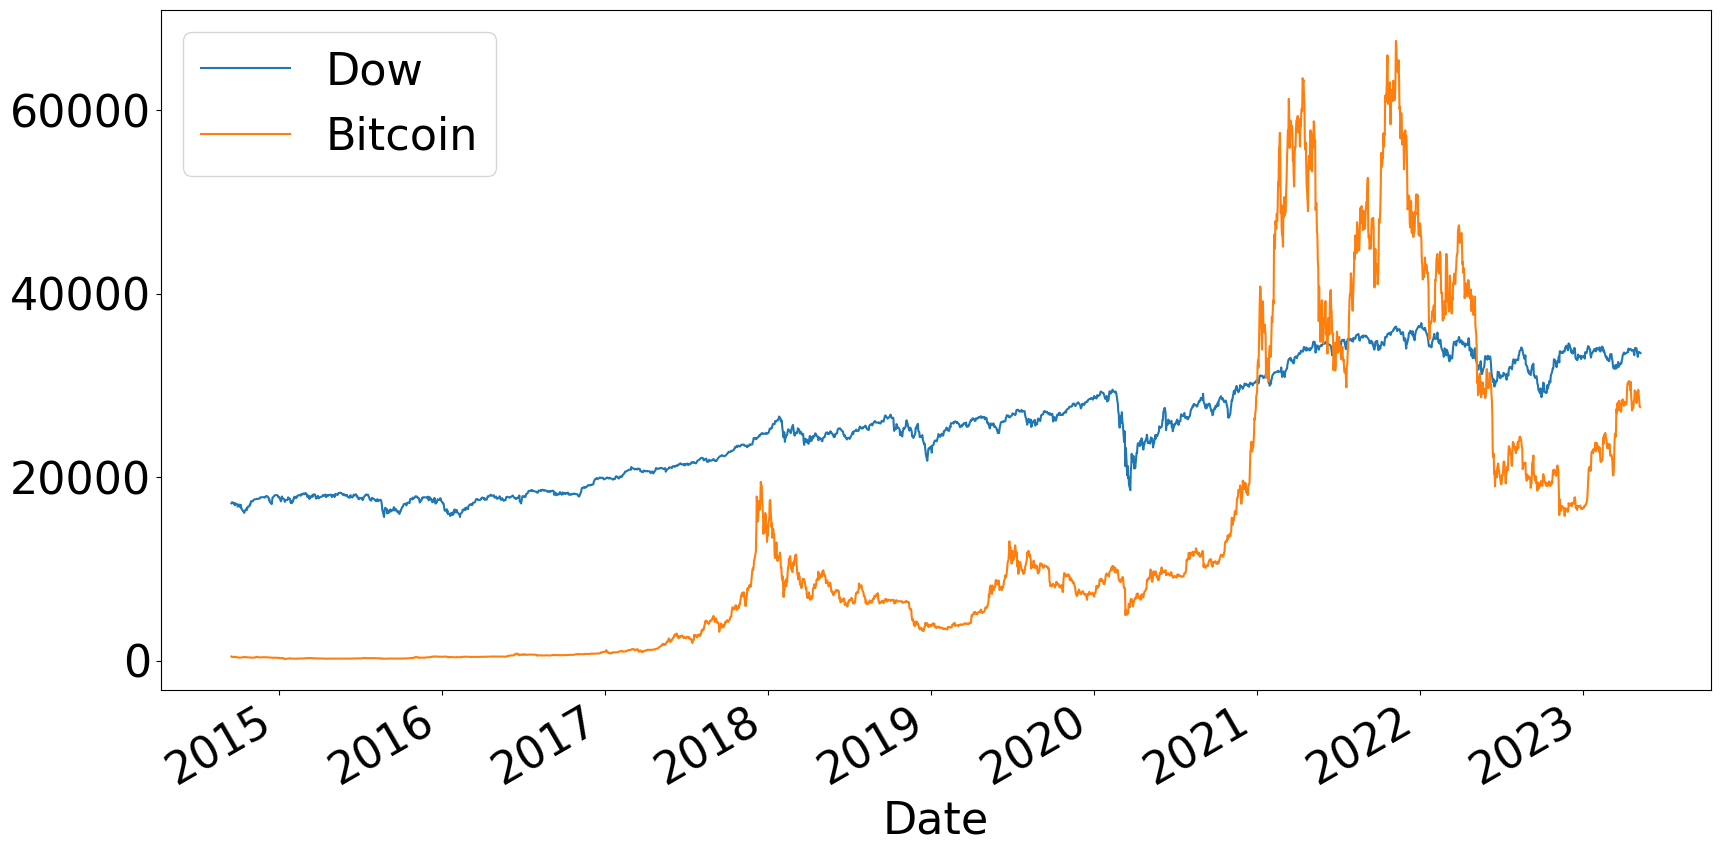

In [11]:
fig, ax=plt.subplots(figsize=(20,10))
DJI.plot.line(ax=ax,legend=True,label= "Dow")
data_dict["BTC-USD"]["Close"].plot.line(ax=ax,legend=True,label="Bitcoin")

<AxesSubplot:xlabel='Date'>

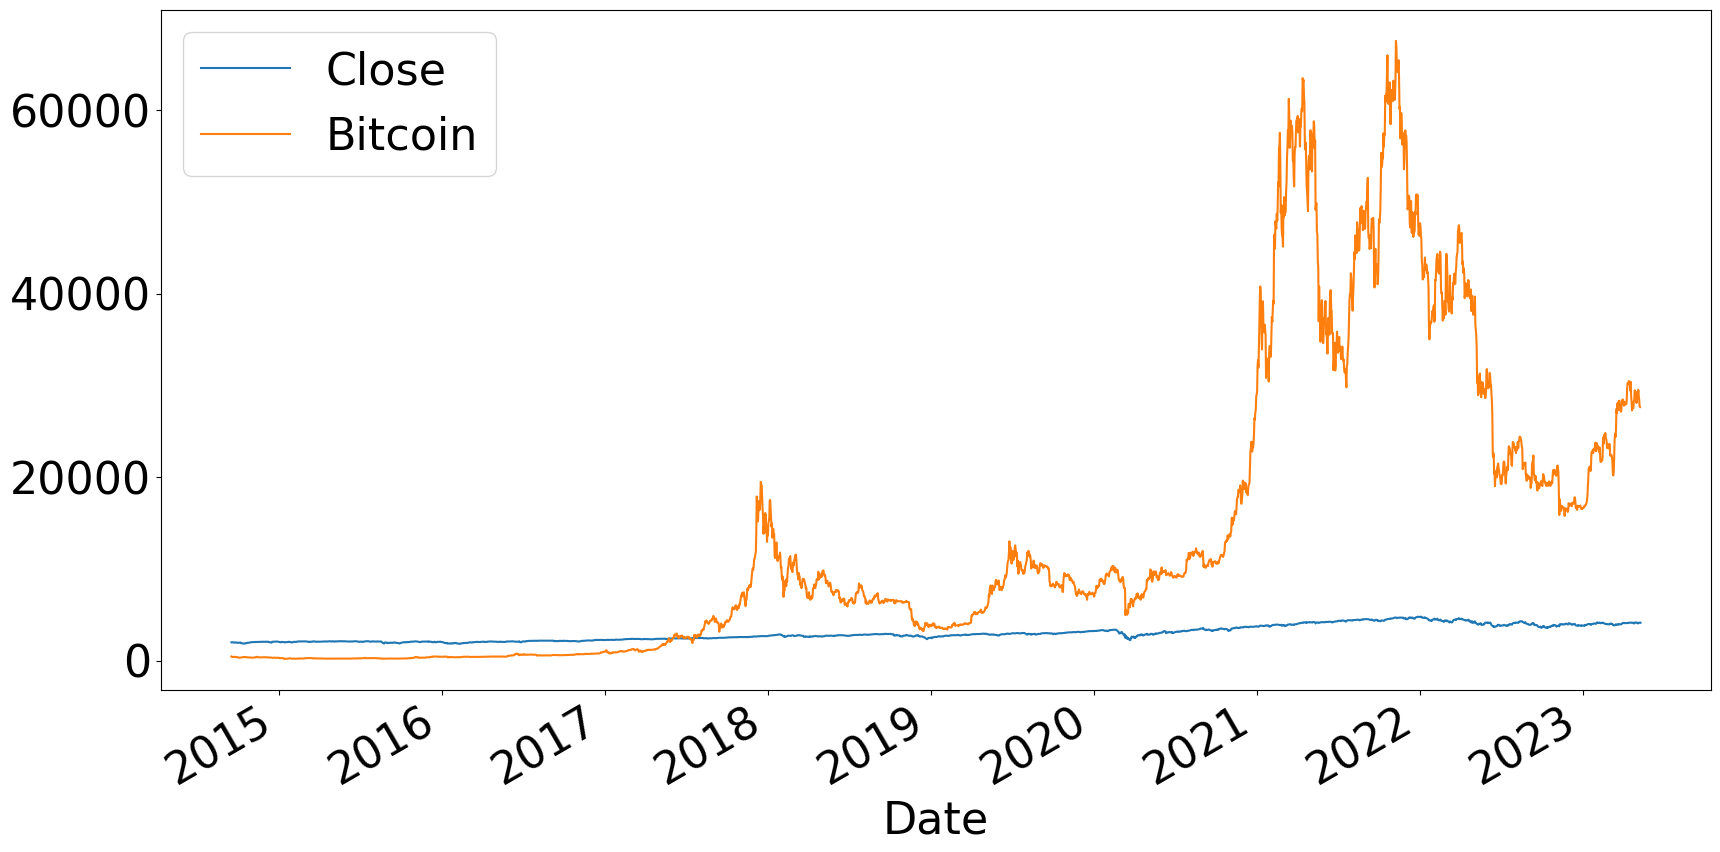

In [12]:
fig, ax=plt.subplots(figsize=(20,10))
data_dict["^GSPC"]["Close"].plot.line(ax=ax,legend=True)
data_dict["BTC-USD"]["Close"].plot.line(ax=ax,legend=True,label="Bitcoin")

<AxesSubplot:xlabel='Date'>

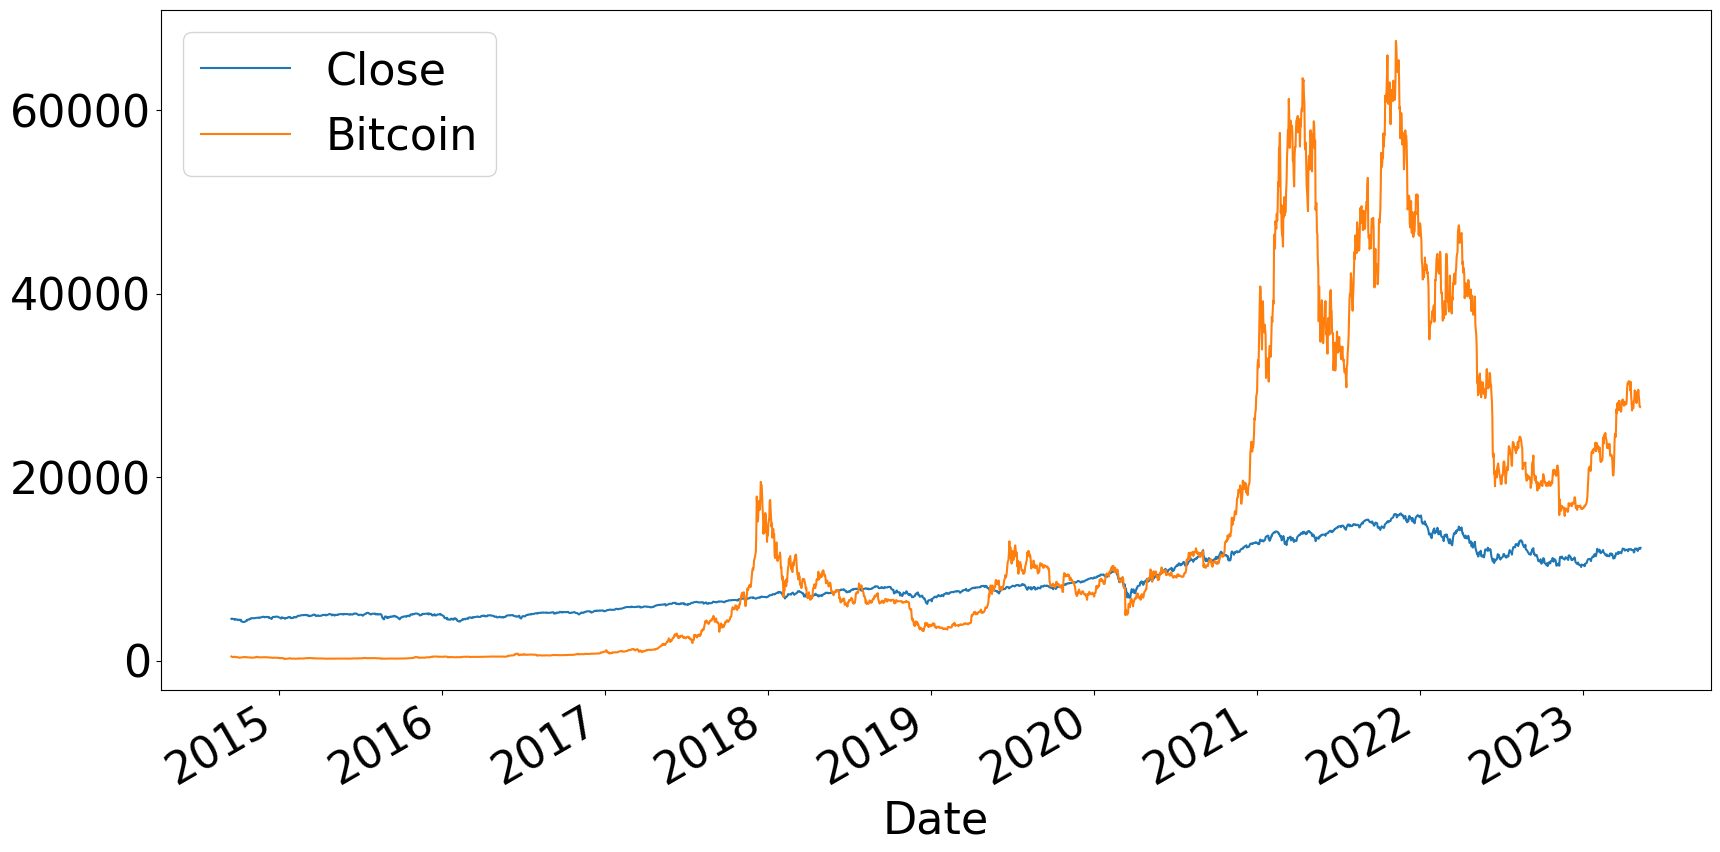

In [13]:
fig, ax=plt.subplots(figsize=(20,10))
data_dict["^IXIC"]["Close"].plot.line(ax=ax,legend=True)
data_dict["BTC-USD"]["Close"].plot.line(ax=ax,legend=True,label="Bitcoin")

<AxesSubplot:xlabel='Date'>

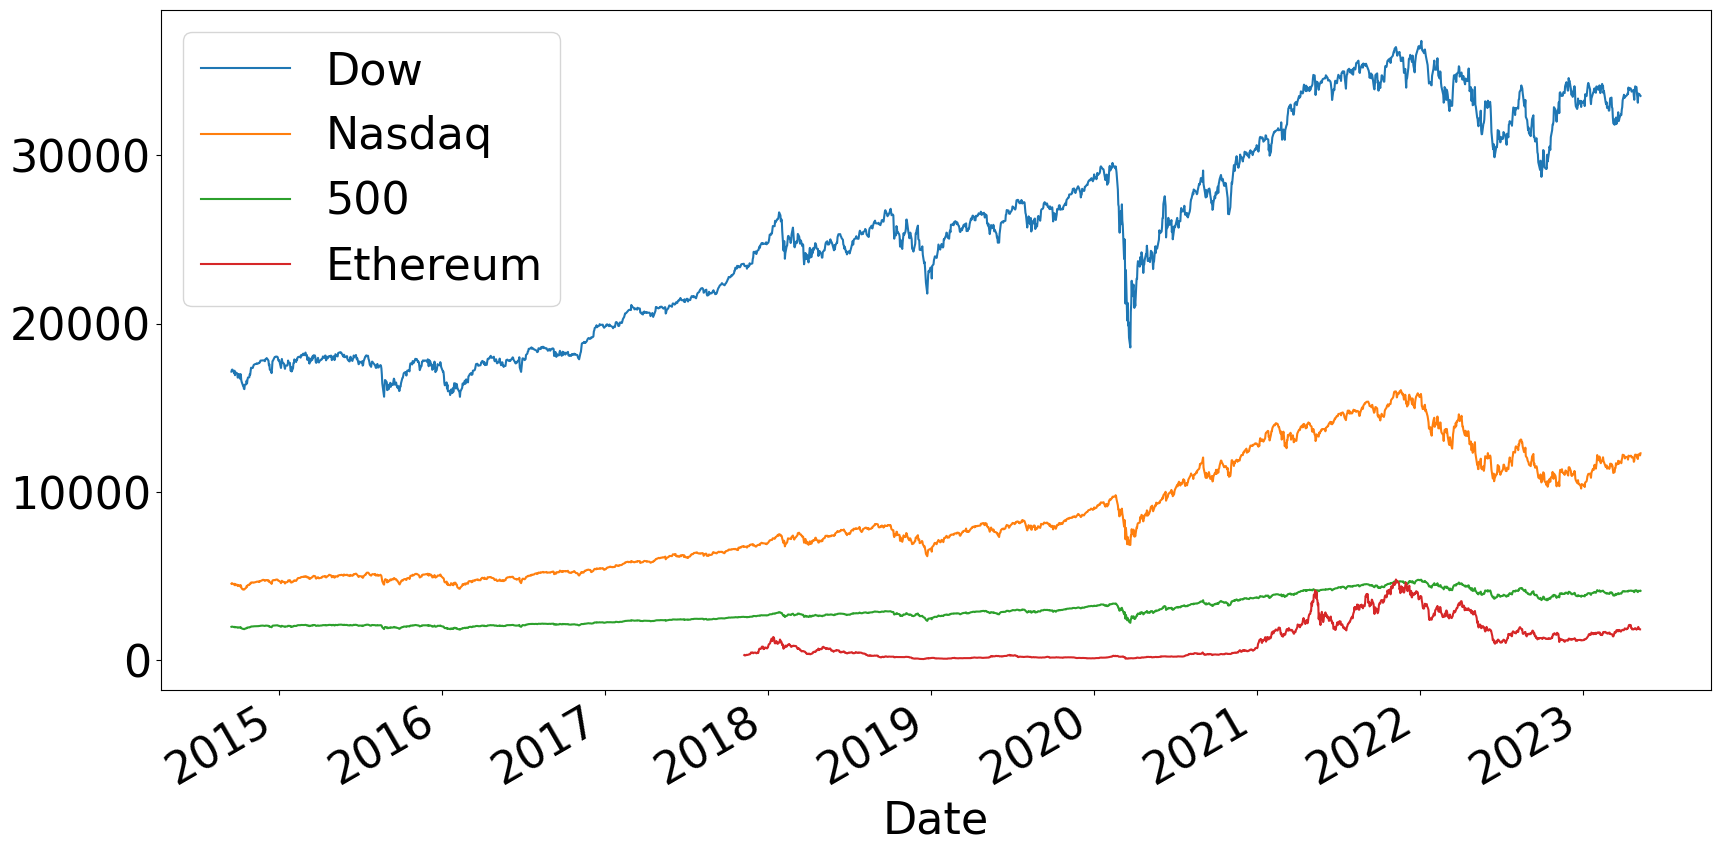

In [14]:
fig, ax=plt.subplots(figsize=(20,10))
data_dict["^DJI"]["Close"].plot.line(ax=ax,legend=True,label="Dow")
data_dict["^IXIC"]["Close"].plot.line(ax=ax,legend=True,label="Nasdaq")
data_dict["^GSPC"]["Close"].plot.line(ax=ax,legend=True,label="500")
data_dict["ETH-USD"]["Close"].plot.line(ax=ax,legend=True,label="Ethereum")

<AxesSubplot:xlabel='Date'>

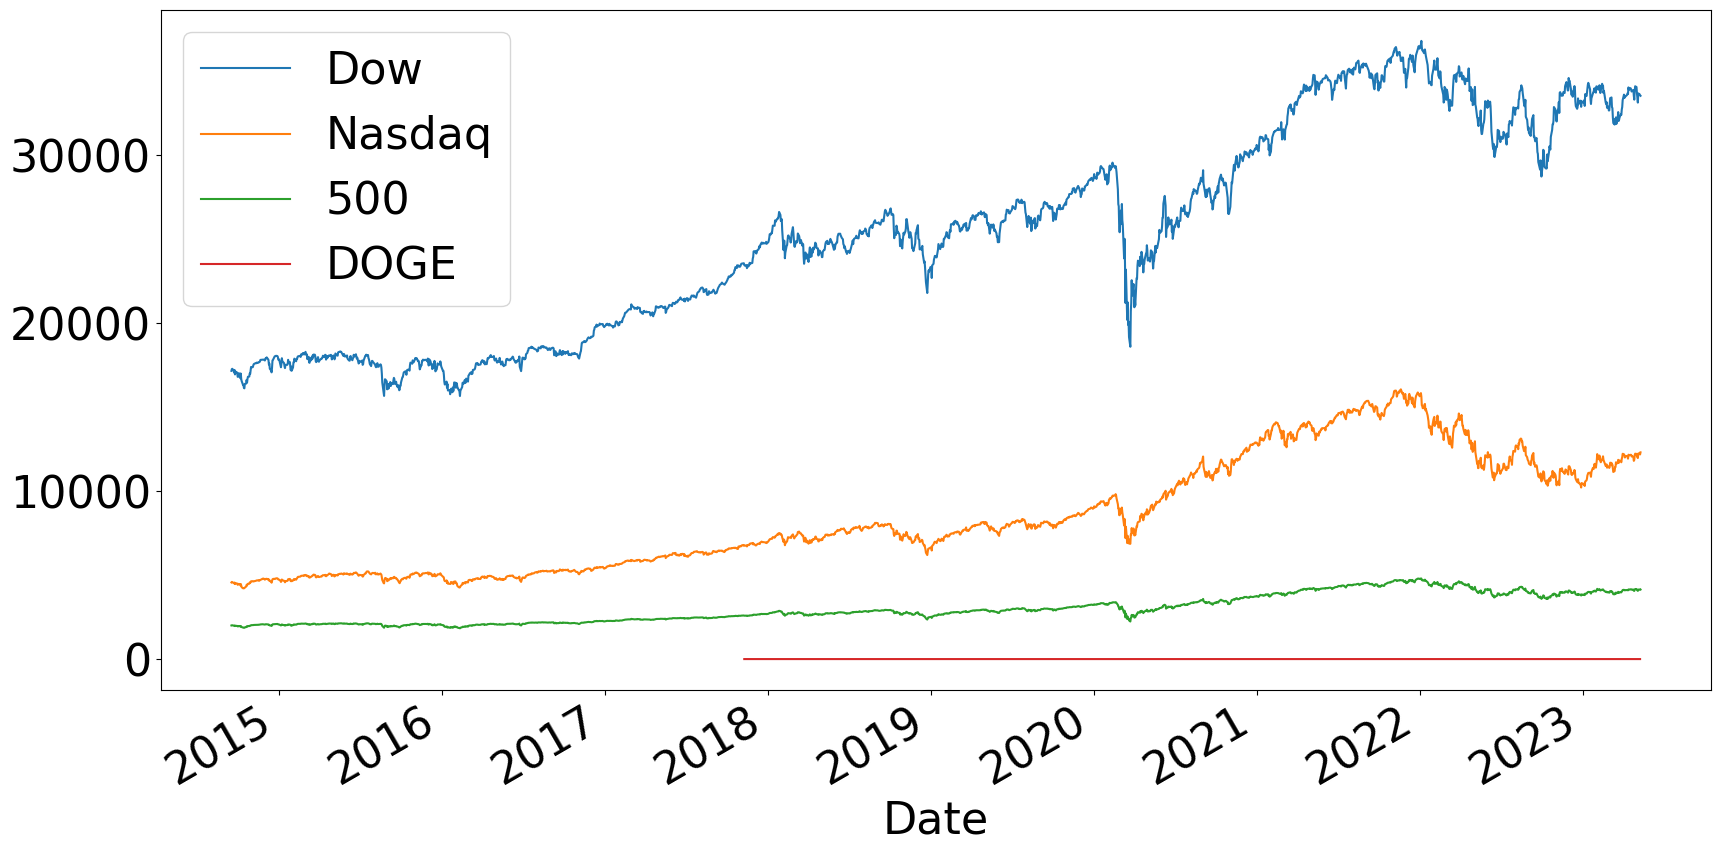

In [15]:
fig, ax=plt.subplots(figsize=(20,10))
data_dict["^DJI"]["Close"].plot.line(ax=ax,legend=True,label="Dow")
data_dict["^IXIC"]["Close"].plot.line(ax=ax,legend=True,label="Nasdaq")
data_dict["^GSPC"]["Close"].plot.line(ax=ax,legend=True,label="500")
data_dict["DOGE-USD"]["Close"].plot.line(ax=ax,legend=True,label="DOGE")

In [23]:
data.keys()
data.sort_index(inplace=True)
data

,BTC-USD,ETH-USD,DOGE-USD,^GSPC,^DJI,^IXIC,^CMC200
Date,,,,,,,
2014-09-17,457.334015,NaN,NaN,2001.569946,17156.849609,4562.189941,NaN
2014-09-18,424.440002,NaN,NaN,2011.359985,17265.990234,4593.430176,NaN
2014-09-19,394.795990,NaN,NaN,2010.400024,17279.740234,4579.790039,NaN
2014-09-20,408.903992,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-21,398.821014,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2023-05-06,28904.623047,1900.221802,0.076998,NaN,NaN,NaN,NaN
2023-05-07,28454.978516,1873.076416,0.076710,NaN,NaN,NaN,NaN
2023-05-08,27694.273438,1849.042725,0.072473,4138.120117,33618.691406,12256.919922,605.125000


In [74]:
dataT=data.T
dataT

Date,2018-12-31,2019-01-02,2019-01-03,2019-01-04,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-14,...,2023-04-26,2023-04-27,2023-04-28,2023-05-01,2023-05-02,2023-05-03,2023-05-04,2023-05-05,2023-05-08,2023-05-09
BTC-USD,3742.700439,3943.409424,3836.741211,3857.717529,4025.248291,4030.847900,4035.296387,3678.924561,3687.365479,3706.052246,...,28422.701172,29473.787109,29340.261719,28091.568359,28680.537109,29006.308594,28847.710938,29534.384766,27694.273438,27658.775391
ETH-USD,133.368256,155.047684,149.135010,154.581940,151.699219,150.359634,150.803116,128.625183,127.548325,129.068726,...,1866.564209,1908.786377,1892.512817,1831.954834,1870.789307,1904.651855,1877.704102,1995.060913,1849.042725,1848.603149
DOGE-USD,0.002346,0.002407,0.002360,0.002315,0.002285,0.002276,0.002266,0.002132,0.002129,0.002183,...,0.078623,0.080190,0.080364,0.078820,0.078806,0.079713,0.078449,0.080390,0.072473,0.073139
^GSPC,2506.850098,2510.030029,2447.889893,2531.939941,2549.689941,2574.409912,2584.959961,2596.639893,2596.260010,2582.610107,...,4055.989990,4135.350098,4169.479980,4167.870117,4119.580078,4090.750000,4061.219971,4136.250000,4138.120117,4119.169922
^DJI,23327.460938,23346.240234,22686.220703,23433.160156,23531.349609,23787.449219,23879.119141,24001.919922,23995.949219,23909.839844,...,33301.871094,33826.160156,34098.160156,34051.699219,33684.531250,33414.238281,33127.738281,33674.378906,33618.691406,33561.808594
^IXIC,6635.279785,6665.939941,6463.500000,6738.859863,6823.470215,6897.000000,6957.080078,6986.069824,6971.479980,6905.919922,...,11854.349609,12142.240234,12226.580078,12212.599609,12080.509766,12025.330078,11966.400391,12235.410156,12256.919922,12179.549805
^CMC200,100.000000,107.209999,103.699997,104.480003,107.930000,108.279999,108.919998,97.500000,97.449997,98.120003,...,621.098022,646.598999,640.481018,614.200012,629.867004,638.880005,631.025024,651.854004,605.125000,607.023010


In [208]:
reg_vars = list(data.keys())
reg_vars

['BTC-USD', 'ETH-USD', 'DOGE-USD', '^GSPC', '^DJI', '^IXIC', '^CMC200']

In [209]:
y_var = [reg_vars[-1]]
x_vars = reg_vars[1:-1]
reg_data = data[reg_vars]
reg_data.corr().round(2)

,BTC-USD,ETH-USD,DOGE-USD,^GSPC,^DJI,^IXIC,^CMC200
BTC-USD,1.00,0.92,0.77,0.86,0.83,0.90,0.99
ETH-USD,0.92,1.00,0.85,0.92,0.88,0.89,0.96
DOGE-USD,0.77,0.85,1.00,0.75,0.75,0.74,0.84
^GSPC,0.86,0.92,0.75,1.00,0.98,0.95,0.87
^DJI,0.83,0.88,0.75,0.98,1.00,0.90,0.84
^IXIC,0.90,0.89,0.74,0.95,0.90,1.00,0.90
^CMC200,0.99,0.96,0.84,0.87,0.84,0.90,1.00


In [210]:
x_vars

['ETH-USD', 'DOGE-USD', '^GSPC', '^DJI', '^IXIC']

In [211]:
y = reg_data[y_var]
X = reg_data[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()

C:\Users\joeyw\AppData\Local\Temp\ipykernel_22804\751764529.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


In [212]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ^CMC200   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     5931.
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        19:09:10   Log-Likelihood:                -6085.8
No. Observations:                1060   AIC:                         1.218e+04
Df Residuals:                    1054   BIC:                         1.221e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ETH-USD        0.3305      0.006     51.637      0.000       0.318       0.343
DOGE-USD    -170.8118     49.021     -3.484      0.001    -267.001     -74.623
^GSPC         -1.1135      0.037    -29.999      0.000      -1.186      -1.041
^DJI           0.0884      0.004     22.867      0.000       0.081       0.096
^IXIC          0.1458      0.004     38.689      0.000       0.138       0.153
Constant    -132.2735     34.389     -3.846      0.000    -199.753     -64.794
==============================================================================
Omnibus:                      336.046   Durbin-Watson:                   0.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1160.879
Skew:                           1.524   Prob(JB):                    8.29e-253
Kurtosis:                       7.123   Cond. No.                     7.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [213]:
predictor = results.predict()
reg_data[y_var[0] + " Predictor"] = predictor
reg_data

,BTC-USD,ETH-USD,DOGE-USD,^GSPC,^DJI,^IXIC,^CMC200,^CMC200 Predictor
Date,,,,,,,,
2018-12-31,3742.700439,133.368256,0.002346,2506.850098,23327.460938,6635.279785,100.000000,148.836187
2019-01-02,3943.409424,155.047684,0.002407,2510.030029,23346.240234,6665.939941,107.209999,158.580271
2019-01-03,3836.741211,149.135010,0.002360,2447.889893,22686.220703,6463.500000,103.699997,137.987202
2019-01-04,3857.717529,154.581940,0.002315,2531.939941,23433.160156,6738.859863,104.480003,152.356702
2019-01-07,4025.248291,151.699219,0.002285,2549.689941,23531.349609,6823.470215,107.930000,152.655986
...,...,...,...,...,...,...,...,...
2023-05-03,29006.308594,1904.651855,0.079713,4090.750000,33414.238281,12025.330078,638.880005,634.594226
2023-05-04,28847.710938,1877.704102,0.078449,4061.219971,33127.738281,11966.400391,631.025024,624.874684
2023-05-05,29534.384766,1995.060913,0.080390,4136.250000,33674.378906,12235.410156,651.854004,667.313597


In [214]:
y_hat = reg_data[y_var[0] + " Predictor"]
y_mean = reg_data[y_var[0]].mean()
y = reg_data[y_var[0]]
reg_data["Residuals"] = (y.sub(y_hat))
reg_data["Squared Explained"] = y_hat.sub(y_mean) ** 2
reg_data["Squared Residuals"] = (y.sub(y_hat)) ** 2
reg_data["Squared Totals"] = (y.sub(y_mean)) ** 2
reg_data

,BTC-USD,ETH-USD,DOGE-USD,^GSPC,^DJI,^IXIC,^CMC200,^CMC200 Predictor,Residuals,Squared Explained,Squared Residuals,Squared Totals
Date,,,,,,,,,,,,
2018-12-31,3742.700439,133.368256,0.002346,2506.850098,23327.460938,6635.279785,100.000000,148.836187,-48.836187,156310.751731,2384.973168,197311.625706
2019-01-02,3943.409424,155.047684,0.002407,2510.030029,23346.240234,6665.939941,107.209999,158.580271,-51.370271,148700.827113,2638.904787,190958.279301
2019-01-03,3836.741211,149.135010,0.002360,2447.889893,22686.220703,6463.500000,103.699997,137.987202,-34.287205,165006.995560,1175.612402,194038.255173
2019-01-04,3857.717529,154.581940,0.002315,2531.939941,23433.160156,6738.859863,104.480003,152.356702,-47.876698,153539.393487,2292.178252,193351.681469
2019-01-07,4025.248291,151.699219,0.002285,2549.689941,23531.349609,6823.470215,107.930000,152.655986,-44.725986,153304.939468,2000.413787,190329.534300
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-03,29006.308594,1904.651855,0.079713,4090.750000,33414.238281,12025.330078,638.880005,634.594226,4.285779,8171.526047,18.367899,8964.732672
2023-05-04,28847.710938,1877.704102,0.078449,4061.219971,33127.738281,11966.400391,631.025024,624.874684,6.150340,6508.770540,37.826682,7538.978592
2023-05-05,29534.384766,1995.060913,0.080390,4136.250000,33674.378906,12235.410156,651.854004,667.313597,-15.459593,15157.516038,238.999017,11589.872737


In [223]:
SSR = reg_data["Squared Explained"].sum()
SSE = reg_data["Squared Residuals"].sum()
SST = reg_data["Squared Totals"].sum()
SSR,SSE,SST

(169401058.81293118, 6020657.391406003, 175421716.20367196)

In [218]:
n = results.nobs
k = len(results.params)
estimator_variance = SSE / (n - k)
n, k, estimator_variance

(1060.0, 6, 5712.198663573058)

In [219]:
cov_matrix = results.cov_params()
cov_matrix

,ETH-USD,DOGE-USD,^GSPC,^DJI,^IXIC,Constant
ETH-USD,0.000041,-0.208516,-0.000128,0.000010,0.000005,0.072314
DOGE-USD,-0.208516,2403.014909,0.797264,-0.080425,-0.056522,252.937124
^GSPC,-0.000128,0.797264,0.001378,-0.000133,-0.000109,0.317577
^DJI,0.000010,-0.080425,-0.000133,0.000015,0.000009,-0.072208
^IXIC,0.000005,-0.056522,-0.000109,0.000009,0.000014,-0.023697
Constant,0.072314,252.937124,0.317577,-0.072208,-0.023697,1182.633451


In [220]:
parameters = {}
for x_var in x_vars:
    parameters[x_var] = {}
    parameters[x_var]["Beta"] = results.params[x_var]
    parameters[x_var]["Standard Error"] = cov_matrix.loc[x_var, x_var] ** (1/2)
    parameters[x_var]["t-stats"] = parameters[x_var]["Beta"] / parameters[x_var]["Standard Error"] 
parameters = pd.DataFrame(parameters).T
parameters

,Beta,Standard Error,t-stats
ETH-USD,0.330550,0.006401,51.636552
DOGE-USD,-170.811789,49.020556,-3.484493
^GSPC,-1.113527,0.037118,-29.999315
^DJI,0.088375,0.003865,22.867213
^IXIC,0.145782,0.003768,38.688799


In [222]:
r2=SSR/SST
r2

0.9656789505824321

In [224]:
r2_adjusted = 1 - (SSE / (n - k)) / (SST / (n - 1))
r2_adjusted

0.9655161372512142

(array([-300., -200., -100.,    0.,  100.,  200.,  300.,  400.,  500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

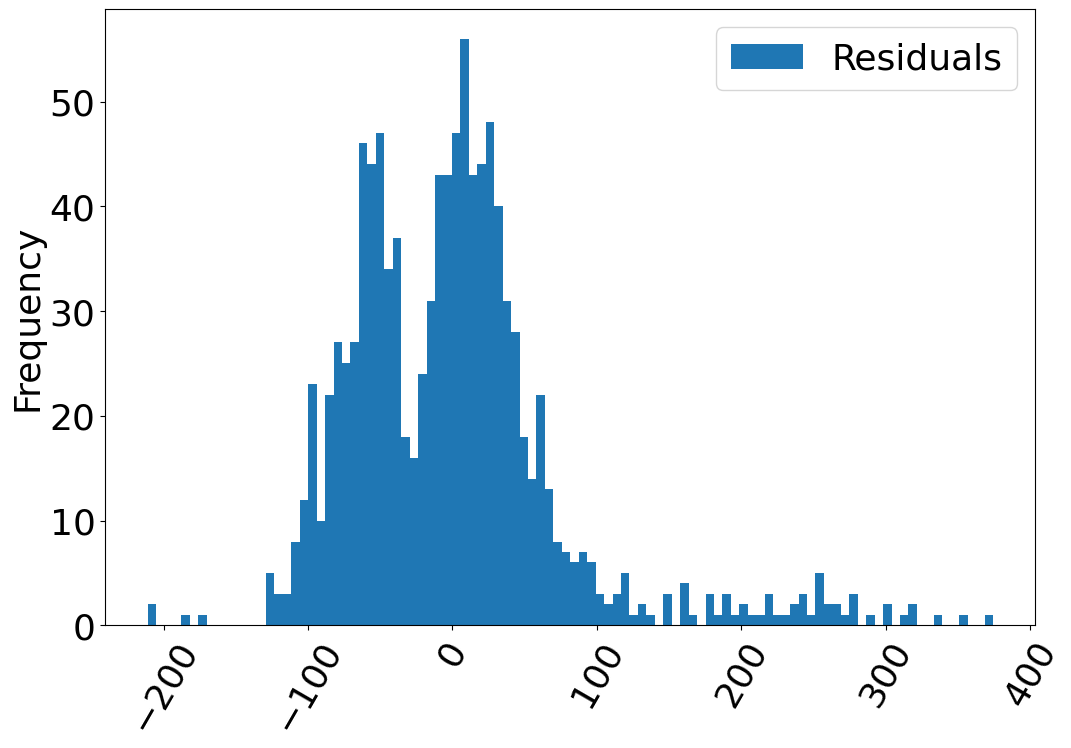

In [225]:
plt.rcParams.update({"font.size":26})
fig, ax = plt.subplots(figsize = (12,8))
reg_data[["Residuals"]].plot.hist(bins = 100, ax = ax)
plt.xticks(rotation=60)

<AxesSubplot:ylabel='Frequency'>

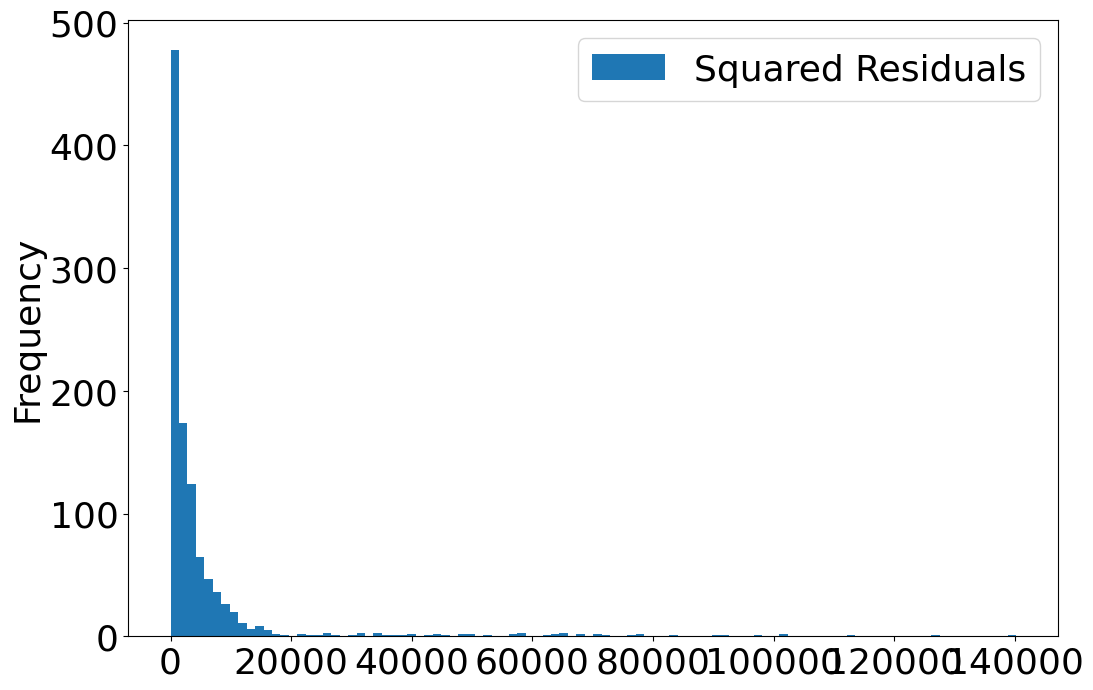

In [226]:
fig, ax = plt.subplots(figsize = (12,8))
reg_data[["Squared Residuals"]].plot.hist(bins =100, ax = ax)

In [227]:
r_df = reg_data.dropna(axis = 0, how = "any")
y = r_df[y_var]
X = r_df[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()
r_df["Predictor"] = results.predict()

C:\Users\joeyw\AppData\Local\Temp\ipykernel_22804\3386029528.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


In [228]:
y,X

(               ^CMC200
 Date                  
 2018-12-31  100.000000
 2019-01-02  107.209999
 2019-01-03  103.699997
 2019-01-04  104.480003
 2019-01-07  107.930000
 ...                ...
 2023-05-03  638.880005
 2023-05-04  631.025024
 2023-05-05  651.854004
 2023-05-08  605.125000
 2023-05-09  607.023010
 
 [1060 rows x 1 columns],
                 ETH-USD  DOGE-USD        ^GSPC          ^DJI         ^IXIC  \
 Date                                                                         
 2018-12-31   133.368256  0.002346  2506.850098  23327.460938   6635.279785   
 2019-01-02   155.047684  0.002407  2510.030029  23346.240234   6665.939941   
 2019-01-03   149.135010  0.002360  2447.889893  22686.220703   6463.500000   
 2019-01-04   154.581940  0.002315  2531.939941  23433.160156   6738.859863   
 2019-01-07   151.699219  0.002285  2549.689941  23531.349609   6823.470215   
 ...                 ...       ...          ...           ...           ...   
 2023-05-03  1904.651855  0.

In [230]:
betaEstimates = results.params
tStats = results.tvalues
pValues = results.pvalues
stdErrors = results.bse

resultsDict = {"Beta Estimates" : betaEstimates,
              "t-stats":tStats,
              "p-values":pValues,
              "Standard Errors":stdErrors}
resultsDF = pd.DataFrame(resultsDict)
resultsDF.round(3)

,Beta Estimates,t-stats,p-values,Standard Errors
ETH-USD,0.331,51.637,0.000,0.006
DOGE-USD,-170.812,-3.484,0.001,49.021
^GSPC,-1.114,-29.999,0.000,0.037
^DJI,0.088,22.867,0.000,0.004
^IXIC,0.146,38.689,0.000,0.004
Constant,-132.273,-3.846,0.000,34.389


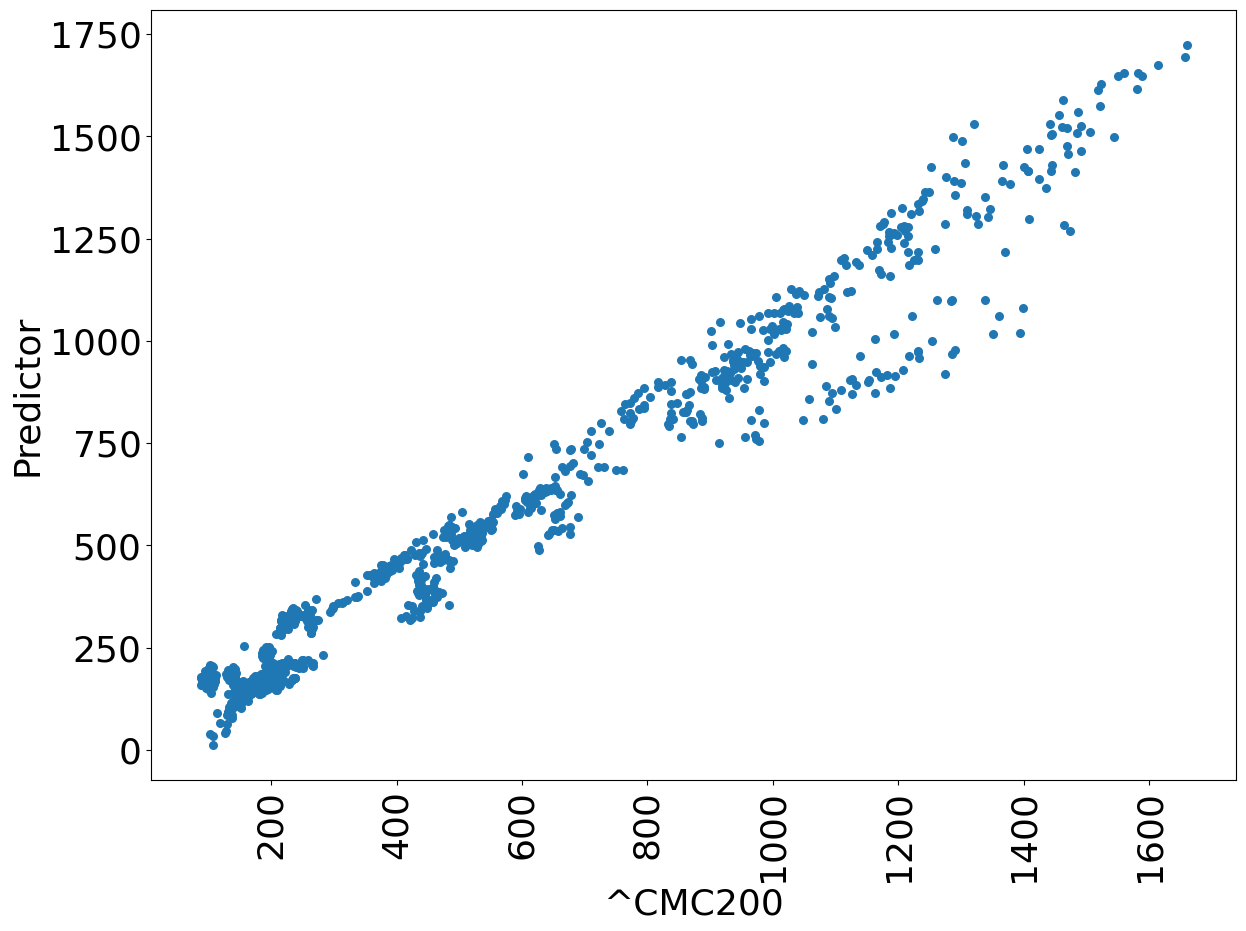

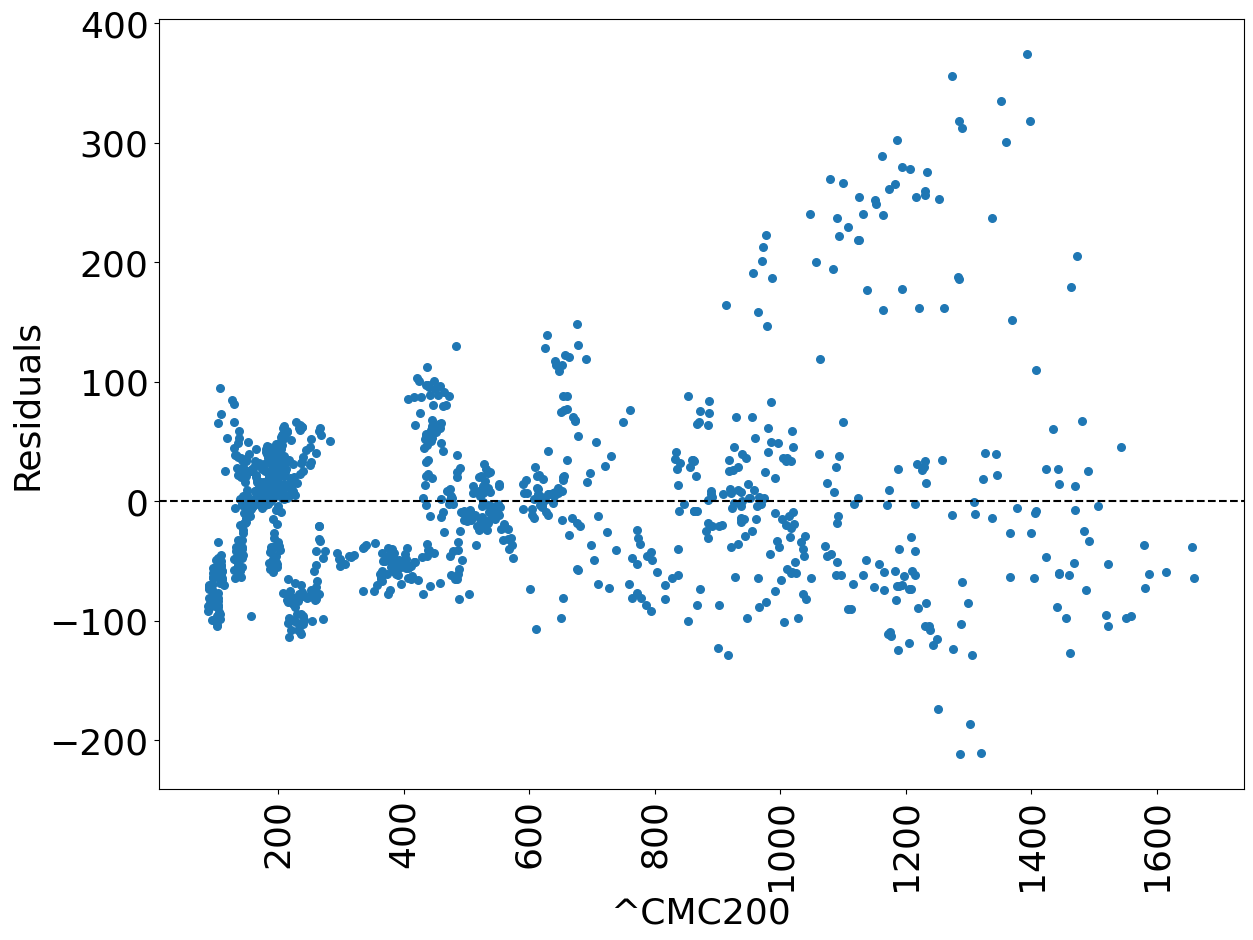

In [231]:
fig, ax = plt.subplots(figsize = (14,10))
r_df.plot.scatter(x = y_var[0],
                 y = "Predictor", 
                  s = 30, ax = ax)
plt.xticks(rotation=90)
plt.show()
plt.close()

fig, ax = plt.subplots(figsize = (14,10))
r_df.plot.scatter(x = y_var[0],
                 y = "Residuals", 
                  s = 30, ax = ax)
ax.axhline(0, ls = "--", color = "k")
plt.xticks(rotation=90)
plt.show()
plt.close()

In [232]:
plot_data = r_df[y_var + ["Predictor"]]
for key in plot_data:
    plot_data[key] = plot_data[key] + 1

plot_data

C:\Users\joeyw\AppData\Local\Temp\ipykernel_22804\1392765561.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data[key] = plot_data[key] + 1


,^CMC200,Predictor
Date,,
2018-12-31,101.000000,149.836187
2019-01-02,108.209999,159.580271
2019-01-03,104.699997,138.987202
2019-01-04,105.480003,153.356702
2019-01-07,108.930000,153.655986
...,...,...
2023-05-03,639.880005,635.594226
2023-05-04,632.025024,625.874684
2023-05-05,652.854004,668.313597


In [55]:
data.index

DatetimeIndex(['2018-12-31', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14',
               ...
               '2023-04-26', '2023-04-27', '2023-04-28', '2023-05-01',
               '2023-05-02', '2023-05-03', '2023-05-04', '2023-05-05',
               '2023-05-08', '2023-05-09'],
              dtype='datetime64[ns]', name='Date', length=1060, freq=None)

In [59]:
data.index.get_level_values("Date")

DatetimeIndex(['2018-12-31', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14',
               ...
               '2023-04-26', '2023-04-27', '2023-04-28', '2023-05-01',
               '2023-05-02', '2023-05-03', '2023-05-04', '2023-05-05',
               '2023-05-08', '2023-05-09'],
              dtype='datetime64[ns]', name='Date', length=1060, freq=None)

In [61]:
work = data.groupby("Date").mean().index
work

DatetimeIndex(['2018-12-31', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14',
               ...
               '2023-04-26', '2023-04-27', '2023-04-28', '2023-05-01',
               '2023-05-02', '2023-05-03', '2023-05-04', '2023-05-05',
               '2023-05-08', '2023-05-09'],
              dtype='datetime64[ns]', name='Date', length=1060, freq=None)

In [235]:
for key in data:
    if "Close" in key:
        data["Log " + key] = np.log(data[key])

In [245]:
key=data_dict.keys()
key

dict_keys(['BTC-USD', 'ETH-USD', 'DOGE-USD', '^GSPC', '^DJI', '^IXIC', '^CMC200'])

In [240]:
def create_indicator_variable(data, indicator_name, index_name,   
                              target_index_list):  
    data[indicator_name] = 0 
    for index in target_index_list:  
        data.loc[data.index.get_level_values(\
            index_name) == index, [indicator_name]] = 1 

In [251]:
X_names = ["Close", "High"]

for key in data_dict:  
    reg_data = data_dict[key]
    reg_data["Close"] = reg_data["Close"].diff()
    reg_data.dropna(inplace = True)
    X = reg_data[X_names]
    X["Constant"] = 1
    Y = reg_data[y_name]      
    print(key)
    data = data_dict[key]  
    results = sm.OLS(Y, X).fit()  
    print(results.summary())

BTC-USD
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.433e+33
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        19:33:55   Log-Likelihood:                 82169.
No. Observations:                3154   AIC:                        -1.643e+05
Df Residuals:                    3151   BIC:                        -1.643e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close          1.0000   1.06e-17   9.42e+16 

C:\Users\joeyw\AppData\Local\Temp\ipykernel_22804\2108195427.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
C:\Users\joeyw\AppData\Local\Temp\ipykernel_22804\2108195427.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
C:\Users\joeyw\AppData\Local\Temp\ipykernel_22804\2108195427.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [254]:
!pip install linearmodels

     ---------------------------------------- 1.9/1.9 MB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 43.8/43.8 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 82.3/82.3 kB 4.8 MB/s eta 0:00:00


In [259]:
data_dict

{'BTC-USD':                     Open          High           Low        Close  \
 Date                                                                
 2014-09-20    394.673004    423.295990    389.882996    40.502014   
 2014-09-21    408.084991    412.425995    393.181000   -67.942993   
 2014-09-22    399.100006    406.915985    397.130005    37.604950   
 2014-09-23    402.092010    441.557007    396.196991    16.894012   
 2014-09-24    435.751007    436.112000    421.131989   -76.532959   
 ...                  ...           ...           ...          ...   
 2023-05-05  28851.480469  29668.908203  28845.509766  1329.640625   
 2023-05-06  29538.859375  29820.126953  28468.966797 -2161.707031   
 2023-05-07  28901.623047  29157.517578  28441.367188  1496.552734   
 2023-05-08  28450.457031  28663.271484  27310.134766  -491.177734   
 2023-05-09  27695.068359  27821.400391  27375.601562  1036.267578   
 
                Adj Close       Volume  
 Date                               